# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


## Step 1: Import the necessary Libraries
we will need to import libraries that allow for data analysis and data visualization to get acclimated to the dataset. We will be using pandas, numpy, matplotlib and seaborn to conduct this. Data Exploration libraries

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
warnings.filterwarnings("ignore",'detected Windows; aliasing chunkize to chunkize_serial')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter


## Step 2: Read in the dataset.
We will use the pandas .read_csv() method to read in the dataset. Then we will use the. head() method to observe the first few rows of the data, to understand the information better. In our case, the feature(column) headers tell us pretty little. This is fine because we are merely trying to gain insight via classifying new data points by referencing it’s neighboring elements.

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv("C:\\VipinML\\Assignment 2\\Assignments_DonorsChoose_2018\\train_data.csv")
resource_data = pd.read_csv("C:\\VipinML\Assignment 2\\Assignments_DonorsChoose_2018\\resources.csv")
#Limit the data for testing purpose since processing takes few hours for full set..
project_data = project_data.head(3000)
resource_data = resource_data.head(3000)

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (3000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]
#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
2521      164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
2521           NJ 2016-04-27 09:33:03          Grades PreK-2   

     project_subject_categories   project_subject_subcategories  \
473            Applied Learning               Early Development   
2521        Literacy & Language  Literacy, Literature & Writing   

                                    project_title  \
473        Flexible Seating for Flexible Learning   
2521  Supplies to Support my Struggling Readers!!   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
2521  My students are all struggling readers. I supp...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
2521  My students live in a lower income area in Cen...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
2521  The materials I am requesting will be used dur...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
2521  Imagine not being able to read the text you ar...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
2521  My students need phonics and reading comprehen...   

      teacher_number_of_previously_posted_projects  project_is_approved  
473                                              2                    1  
2521                                            27                    0

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (3000, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
473       100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
2521      164738  p248458  40da977f63fb3d85589a063471304b11            Ms.   

     school_state                Date project_grade_category  \
473            GA 2016-04-27 00:53:00          Grades PreK-2   
2521           NJ 2016-04-27 09:33:03          Grades PreK-2   

                                    project_title  \
473        Flexible Seating for Flexible Learning   
2521  Supplies to Support my Struggling Readers!!   

                                        project_essay_1  \
473   I recently read an article about giving studen...   
2521  My students are all struggling readers. I supp...   

                                        project_essay_2  \
473   I teach at a low-income (Title 1) school. Ever...   
2521  My students live in a lower income area in Cen...   

                                        project_essay_3  \
473   We need a classroom rug that we can use as a c...   
2521  The materials I am requesting will be used dur...   

                                        project_essay_4  \
473   Benjamin Franklin once said, \"Tell me and I f...   
2521  Imagine not being able to read the text you ar...   

                               project_resource_summary  \
473   My students need flexible seating in the class...   
2521  My students need phonics and reading comprehen...   

      teacher_number_of_previously_posted_projects  project_is_approved  \
473                                              2                    1   
2521                                            27                    0   

       clean_categories          clean_subcategories  \
473     AppliedLearning             EarlyDevelopment   
2521  Literacy_Language  Literacy Literature_Writing   

                                                  essay  
473   I recently read an article about giving studen...  
2521  My students are all struggling readers. I supp...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [12]:
sent = decontracted(project_data['essay'].values[2000])
print(sent)
print("="*20)

Our Pre K-5th grade school is one of the feeder schools in town. We have over 500 wonderful students here!\r\n\r\n I am currently  a Pre-K teacher who has taught other grade levels in the past. I love teaching Pre K. I feel like I have found my niche.\r\n\r\nThough it is not easy, our school is one that works hard to bring technology to our students. Our students truly love and embrace the technology resources we have. We could use help with this project. My students would appreciate it!\r\nObviously, we live in a technology-driven world filled with devices students love. At this point, I would love my students to have not only an iPad, but a \"Comfy iPad Corner\" where they would work in an iPad center. A is for Apple, B is for Ball and C is for a \"Comfy iPad Corner!\" \r\n\r\nWithout a doubt, we live in a world filled with technology unlike ever before.\r\n\r\nAt times, though, it is difficult for schools to receive additional funding for extra resources. I offer technology lessons 

In [13]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Our Pre K-5th grade school is one of the feeder schools in town. We have over 500 wonderful students here!     I am currently  a Pre-K teacher who has taught other grade levels in the past. I love teaching Pre K. I feel like I have found my niche.    Though it is not easy, our school is one that works hard to bring technology to our students. Our students truly love and embrace the technology resources we have. We could use help with this project. My students would appreciate it!  Obviously, we live in a technology-driven world filled with devices students love. At this point, I would love my students to have not only an iPad, but a  Comfy iPad Corner  where they would work in an iPad center. A is for Apple, B is for Ball and C is for a  Comfy iPad Corner!      Without a doubt, we live in a world filled with technology unlike ever before.    At times, though, it is difficult for schools to receive additional funding for extra resources. I offer technology lessons to my Pre-K students d

In [14]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Our Pre K 5th grade school is one of the feeder schools in town We have over 500 wonderful students here I am currently a Pre K teacher who has taught other grade levels in the past I love teaching Pre K I feel like I have found my niche Though it is not easy our school is one that works hard to bring technology to our students Our students truly love and embrace the technology resources we have We could use help with this project My students would appreciate it Obviously we live in a technology driven world filled with devices students love At this point I would love my students to have not only an iPad but a Comfy iPad Corner where they would work in an iPad center A is for Apple B is for Ball and C is for a Comfy iPad Corner Without a doubt we live in a world filled with technology unlike ever before At times though it is difficult for schools to receive additional funding for extra resources I offer technology lessons to my Pre K students daily My goal this year is to implement ano

In [15]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [16]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 3000/3000 [00:03<00:00, 981.49it/s] 


In [17]:
# after preprocesing
preprocessed_essays[1000]

'my students power ability choose every day school they know driver seat learning my students come help well peers we learn many new things not text books also people around us when come school day full excitement ready learn peers i teach title i school nebraska majority students receive free reduced meals many students receive backpack food weekend we also students living nearby lake communities privilege know despite differences students accepting differences they want school day see friends experience new things together in fourth grade science dive earth related topics plant science always one favorite topics studying plants easily hands looking real life plants allows students see touch smell learning when students take part learning planting seeds providing necessary care watching things grow become invested process every year i hear oohs ahs students see changes happening front seeds begin grow having necessary tools kits science class makes learning process possible every stud

## Step 3: Standardize (normalize) the data scale to prep for KNN algorithm.
Because the distance between pairs of points plays a critical part on the classification, it is necessary to normalize the data This will generate an array of values. Again, KNN depends on the distance between each feature. Please see Section 1 for all normalization.

## 1.4 Preparing data for models

In [18]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.4.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [19]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (3000, 9)


In [20]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['Economics', 'FinancialLiteracy', 'ForeignLanguages', 'CommunityService', 'ParentInvolvement', 'Civics_Government', 'Extracurricular', 'Warmth', 'Care_Hunger', 'NutritionEducation', 'SocialSciences', 'CharacterEducation', 'PerformingArts', 'History_Geography', 'College_CareerPrep', 'TeamSports', 'Other', 'Music', 'ESL', 'EarlyDevelopment', 'Health_LifeScience', 'Gym_Fitness', 'VisualArts', 'EnvironmentalScience', 'AppliedSciences', 'Health_Wellness', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']
Shape of matrix after one hot encodig  (3000, 30)


In [21]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

### 1.4.2 Vectorizing Text data

In [22]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('C:\\VipinML\\InputData\\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [23]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 3000/3000 [00:01<00:00, 1760.52it/s]


3000
300


### 1.4.3 Vectorizing Numerical features

In [24]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [25]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# the cost feature is already in numerical values,  we are going to represent the money, as numerical values within the range 0-1
# normalization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
from sklearn.preprocessing import normalize

#price_normalized = normalize(project_data['price'].values)
#this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1) or array.reshape(1, -1)

#price_normalized = normalize(project_data['price'].values.reshape(1,-1))

In [26]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
                 
#print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))
                 

In [27]:
price_standardized

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

## 1.4.2.1 Bag of words

In [28]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (3000, 3327)


<h4><font color='red'> 1.4.2.1.3 Bag of Words on `project_title`</font></h4>

In [29]:
# PROJECT_TITLE BOW
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
project_title_bow = vectorizer.fit_transform(project_data['project_title'])
print("Shape of matrix after one hot encodig ",project_title_bow.shape)

Shape of matrix after one hot encodig  (3000, 238)


<h4><font color='red'> 1.4.2.1.1 Bag of Words on  `preprocessed_essays`</font></h4>

In [30]:
# TEXT BOW
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(project_data['essay'])
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (3000, 3448)


In [31]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())


categories_one_hot = vectorizer.transform(project_data['clean_categories'].values)
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)


['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (3000, 9)


In [32]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
teacher_prefix_data = project_data['teacher_prefix']
teacher_prefix_notnull = teacher_prefix_data[pd.notnull(teacher_prefix_data)]
vectorizer.fit(teacher_prefix_notnull.values)
print(vectorizer.get_feature_names())
teacher_prefix_one_hot = vectorizer.transform(teacher_prefix_notnull.values)
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)
print (teacher_prefix_one_hot) 

['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']
Shape of matrix after one hot encodig  (3000, 9)



In [33]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.T.shape)

(3000, 9)
(3000, 30)
(3000, 3448)
(1, 3000)


## 1.5 TFIDF Processing

#### 1.5.1 Using Pretrained Models: TFIDF weighted W2V

In [34]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

#### 1.5.2 TFIDF vectorizer

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (3000, 3327)


### 1.5.3 TFIDF Project Title

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
project_title_tfidf = vectorizer.fit_transform((project_data['project_title']))
print("Shape of matrix after one hot encodig ",project_title_tfidf.shape)

Shape of matrix after one hot encodig  (3000, 238)


### 1.5.4 TFIDF AVG W2V for Project Title

In [37]:
# average Word2Vec
# compute average word2vec for each review.
project_title_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    project_title_avg_w2v_vectors.append(vector)

print(len(project_title_avg_w2v_vectors))
print(len(project_title_avg_w2v_vectors[0]))

100%|██████████| 3000/3000 [00:00<00:00, 45980.93it/s]


3000
300


### 1.5.5 TFIDF  W2V for Project Title

In [38]:
# average Word2Vec
# compute average word2vec for each review.
project_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(project_data['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    project_title_tfidf_w2v_vectors.append(vector)

print(len(project_title_tfidf_w2v_vectors))
print(len(project_title_tfidf_w2v_vectors[0]))

100%|██████████| 3000/3000 [00:00<00:00, 46491.45it/s]


3000
300


### 1.5.6 TFIDF  W2V for Preprocessed Array

In [39]:
# average Word2Vec
# compute average word2vec for each review.
preprocessed_essays_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    preprocessed_essays_tfidf_w2v_vectors.append(vector)

print(len(preprocessed_essays_tfidf_w2v_vectors))
print(len(preprocessed_essays_tfidf_w2v_vectors[0]))

100%|██████████| 3000/3000 [00:11<00:00, 271.28it/s]


3000
300


# Assignment 3: Apply KNN

<ol>
    <li><strong>[Task-1] Apply KNN(brute force version) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_essay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_essay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_essay (TFIDF W2V)</li>
        </ul>
    </li>
    <br>
    <li><strong>Hyper paramter tuning to find best K</strong>
        <ul>
    <li>Find the best hyper parameter which results in the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation (or) simple cross validation data</li>
    <li>Use gridsearch-cv or randomsearch-cv or  write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, as shown in the figure
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once you find the best hyper parameter, you need to train your model-M using the best hyper-param. Now, find the AUC on test data and plot the ROC curve on both train and test using model-M.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <li><strong> [Task-2] </strong>
        <ul>
            <li>Select top 2000 features from feature <font color='red'>Set 2</font> using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html'>`SelectKBest`</a>
and then apply KNN on top of these features</li>
            <li>
                <pre>
                from sklearn.datasets import load_digits
                from sklearn.feature_selection import SelectKBest, chi2
                X, y = load_digits(return_X_y=True)
                X.shape
                X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
                X_new.shape
                ========
                output:
                (1797, 64)
                (1797, 20)
                </pre>
            </li>
            <li>Repeat the steps 2 and 3 on the data matrix after feature selection</li>
        </ul>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'> link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. K Nearest Neighbor</h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [40]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [41]:
def knn_cross_validation(X,y):
    from sklearn import model_selection
    from mlxtend.plotting import plot_decision_regions
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    # Import classification report and confusion matrix to evaluate predictions
    from sklearn.metrics import classification_report, confusion_matrix
    
# split the data set into train and test
# Break up the data as you see test data to 30%, train data is 70%. so we break data into two matrix. 
# x1 and y1 would be 70% as train data and x-test and y_test will be test data as 30%.
 
    neighbors = np.arange(1,50,5)
    train_accuracy =np.empty(len(neighbors))
    test_accuracy = np.empty(len(neighbors))

    X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

    for i,k in enumerate(neighbors): 
        knn = KNeighborsClassifier(n_neighbors=k) # Number of nearest neighbor is i.

        # fitting the model on crossvalidation train
        knn.fit(X_tr, y_tr)

        # predict the response on the crossvalidation train
        pred = knn.predict(X_cv)  # predicting the value using cross validation data. 
        # evaluate CV accuracy
        acc = accuracy_score(y_cv, pred, normalize=True) * float(100)  # I get the accuracy score. 
        print('\nCV accuracy for k = %d is %d%%' % (k, acc))
        
        #Compute accuracy on the training set
        train_accuracy[i] = knn.score(X_tr, y_tr)
      
        #Compute accuracy on the test set
        test_accuracy[i] = knn.score(X_test, y_test) 
    
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y_cv, pred)
        roc_auc = auc(false_positive_rate, true_positive_rate)
        plt.title('Receiver Operating Characteristic')
        plt.plot(false_positive_rate, true_positive_rate, 'b',
        label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.1,1.2])
        plt.ylim([-0.1,1.2])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()
   
        #Generate plot
        plt.title('k-NN Varying number of neighbors')
        plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
        plt.plot(neighbors, train_accuracy, label='Training accuracy')
        plt.legend()
        plt.xlabel('Number of neighbors')
        plt.ylabel('Accuracy')
        plt.show()

        # Print out classification report and confusion matrix
        print(classification_report(y_cv, pred))

        # Print out confusion matrix
        cmat = confusion_matrix(y_cv, pred)
        #print(cmat)
        print('TP - True Negative {}'.format(cmat[0,0]))
        print('FP - False Positive {}'.format(cmat[0,1]))
        print('FN - False Negative {}'.format(cmat[1,0]))
        print('TP - True Positive {}'.format(cmat[1,1]))
        print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
        print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))


### Split the normalized data into training and test sets
Logic below is simialr as covred in kanalysis_cross_validation(X,y), but here logic is for to  calculate confusion matrix, acuarcy ration for best K as we already foound best K after trying best accuracy for multiple K values.
We can apply  K -fold CV to either the hyperparameter tuning, performance reporting, or both. The advantage of this approach is that the performance is less sensitive to unfortunate splits of data. In addition, it utilize data better since each example can be used for both training and validation/testing.

Let's use  K -Fold CV to select the hyperparamter n_neighbors of the KNeighborsClassifier:

In [42]:

def knn_best_nfold_validation(X,y, k):
    from sklearn import model_selection
    from mlxtend.plotting import plot_decision_regions
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    # Import classification report and confusion matrix to evaluate predictions
    from sklearn.metrics import classification_report, confusion_matrix
    
    # split the data set into train and test
    # Break up the data as you see test data to 30%, train data is 70%. so we break data into two matrix. 
    # x1 and y1 would be 70% as train data and x-test and y_test will be test data as 30%.
 
    X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

    # instantiate learning model (k = 30)
    knn = KNeighborsClassifier(n_neighbors=k) # Number of nearest neighbor is k.
   
   
    # fitting the model on crossvalidation train
    knn.fit(X_tr, y_tr)

    # predict the response on the crossvalidation train
    pred = knn.predict(X_cv)  # predicting the value using cross validation data. 

    # evaluate CV accuracy
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)  # I get the accuracy score. 
    print (k)
    print('\nCV accuracy for k = %d is %d%%' % (k, acc))

    # We are doing the same thing on test data what we did  above to find accuracy. 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    pred = knn.predict(X_test)
    acc = accuracy_score(y_test, pred, normalize=True) * float(100)
    print('\n****Test accuracy for k = %d is %d%%' % (k, acc))
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
  
    # Print out classification report and confusion matrix
    print(classification_report(y_test, pred))
    
    # Print out confusion matrix
    cmat = confusion_matrix(y_test, pred)
    #print(cmat)
    print('TP - True Negative {}'.format(cmat[0,0]))
    print('FP - False Positive {}'.format(cmat[0,1]))
    print('FN - False Negative {}'.format(cmat[1,0]))
    print('TP - True Positive {}'.format(cmat[1,1]))
    print('Accuracy Rate: {}'.format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat))))
    print('Misclassification Rate: {}'.format(np.divide(np.sum([cmat[0,1],cmat[1,0]]),np.sum(cmat))))


### Split the normalized data into training and test sets
This step is required to prepare us for the fitting (i.e. training) the #model later. The “X” variable is a collection of all the features. The “y” variable is the target label which specifies the #classification of 1 or 0 based. Our goal will be to identify which category the new data point should fall into. Evaluate the predictions. Evaluate the Model by reviewing the classification report or confusion matrix. By reviewing these tables, we are able to evaluate how accurate our model is with new values.
Pleazse refer this website also. very well covered , how to draw confusion matrix or calculate accuracy ration. https://medium.com/@kbrook10/day-11-machine-learning-using-knn-k-nearest-neighbors-with-scikit-learn-350c3a1402e6

In [43]:
def kanalysis_cross_validation(X,y):
    from sklearn import model_selection
    from mlxtend.plotting import plot_decision_regions
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    # Import classification report and confusion matrix to evaluate predictions
    from sklearn.metrics import classification_report, confusion_matrix
    
    # split the data set into train and test
    # Break up the data as you see test data to 30%, train data is 70%. so we break data into two matrix. 
    # x1 and y1 would be 70% as train data and x-test and y_test will be test data as 30%.
 
    error_rate = []
    
    X_1, X_test, y_1, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)
    # split the train data set into cross validation train and cross validation test
    X_tr, X_cv, y_tr, y_cv = model_selection.train_test_split(X_1, y_1, test_size=0.3)

    #Evaluate alternative K-values for better predictionsTo simplify the process of evaluating multiple cases of k-values, 
    #we create a function to derive the error using the average where our predictions were not equal to the test values.
    for i in range(1,50,5):  # taking only odd numbers.  1,3,5...
        # instantiate learning model (k = 30)
        knn = KNeighborsClassifier(n_neighbors=i) # Number of nearest neighbor is i.

        # fitting the model on crossvalidation train
        knn.fit(X_tr, y_tr)

        # predict the response on the crossvalidation train
        pred = knn.predict(X_cv)  # predicting the value using cross validation data. 

        # evaluate CV accuracy
        acc = accuracy_score(y_cv, pred, normalize=True) * float(100)  # I get the accuracy score. 
        #print('\nCV accuracy for k = %d is %d%%' % (i, acc))
    

        # evaluate CV accuracy
        error_rate.append(np.mean(pred != y_cv))
        
        #print (error_rate)
   
    # Configure and plot error rate over k values
    plt.figure(figsize=(10,4))
    plt.plot(range(1,50,5), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K-Values')
    plt.xlabel('K-Values')
    plt.ylabel('Error Rate')
       

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [44]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [45]:
def knn(X,y, k):
    from mlxtend.plotting import plot_decision_regions
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.model_selection import train_test_split
    
   # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
    knn = KNeighborsClassifier(n_neighbors=k)
    #model.fit(X, y)
   # Fit (i.e. traing) the model
   # knn.fit(X_train, y_train)
   
    knn.fit(X,y)
    pred = knn.predict(X)
    print (pred)
    
    value = 1.5
    width = 0.75


<h2>2.4 Appling KNN on different kind of featurization as mentioned in the instructions</h2>

<br>Apply KNN on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instructions

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

### 2.4.1 Applying KNN brute force on BOW - Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW),<font color='red'> SET 1</font>

In [48]:
# Please write all the code with proper documentation


CV accuracy for k = 1 is 76%


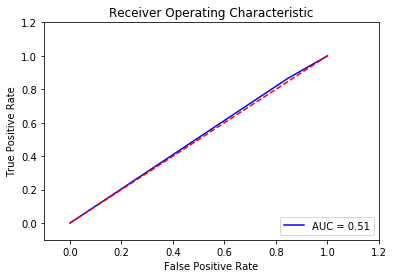

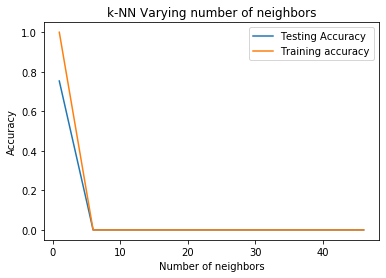

              precision    recall  f1-score   support

           0       0.15      0.15      0.15        85
           1       0.87      0.87      0.87       545

    accuracy                           0.77       630
   macro avg       0.51      0.51      0.51       630
weighted avg       0.77      0.77      0.77       630

TP - True Negative 13
FP - False Positive 72
FN - False Negative 73
TP - True Positive 472
Accuracy Rate: 0.7698412698412699
Misclassification Rate: 0.23015873015873015

CV accuracy for k = 6 is 84%


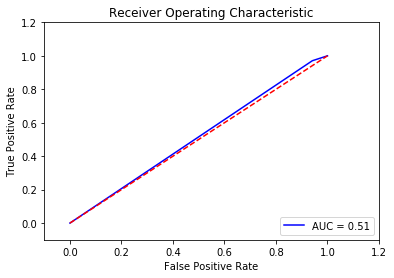

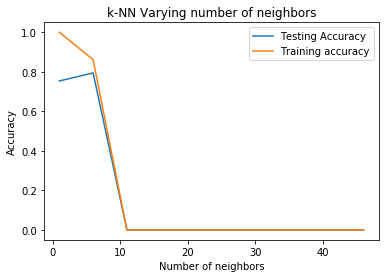

              precision    recall  f1-score   support

           0       0.24      0.06      0.09        85
           1       0.87      0.97      0.92       545

    accuracy                           0.85       630
   macro avg       0.55      0.51      0.51       630
weighted avg       0.78      0.85      0.81       630

TP - True Negative 5
FP - False Positive 80
FN - False Negative 16
TP - True Positive 529
Accuracy Rate: 0.8476190476190476
Misclassification Rate: 0.1523809523809524

CV accuracy for k = 11 is 86%


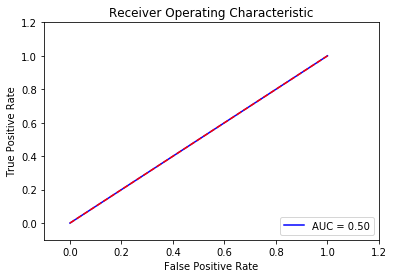

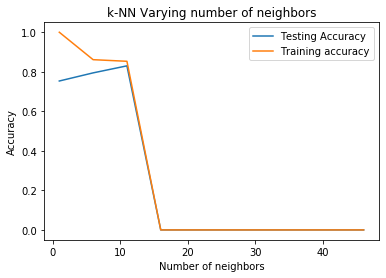

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 16 is 86%


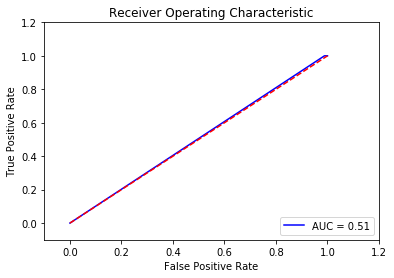

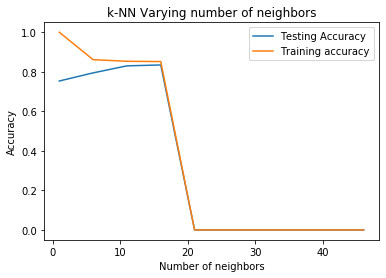

              precision    recall  f1-score   support

           0       1.00      0.01      0.02        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.93      0.51      0.48       630
weighted avg       0.88      0.87      0.81       630

TP - True Negative 1
FP - False Positive 84
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8666666666666667
Misclassification Rate: 0.13333333333333333

CV accuracy for k = 21 is 86%


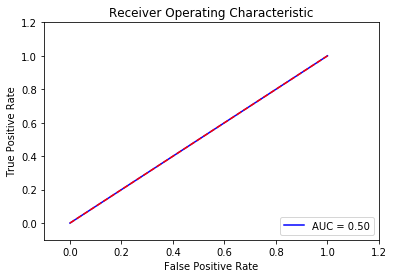

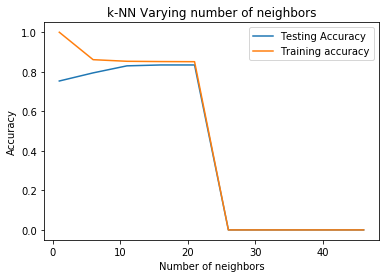

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 26 is 86%


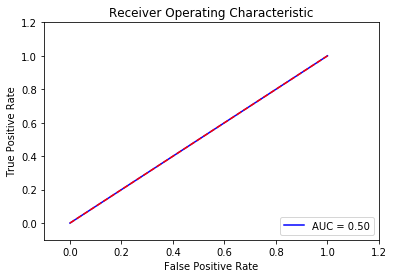

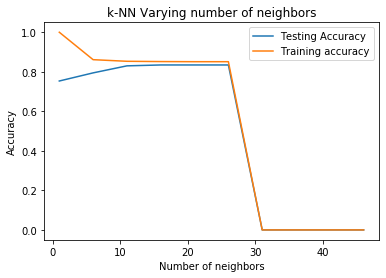

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 31 is 86%


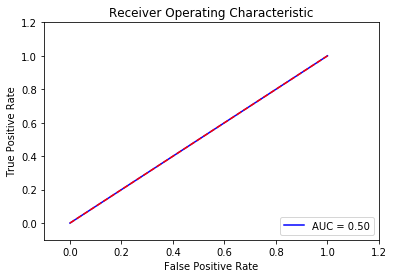

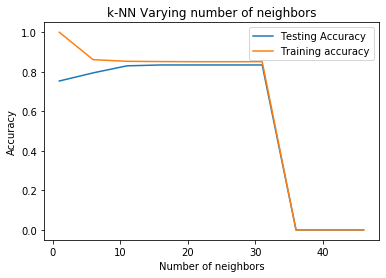

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 36 is 86%


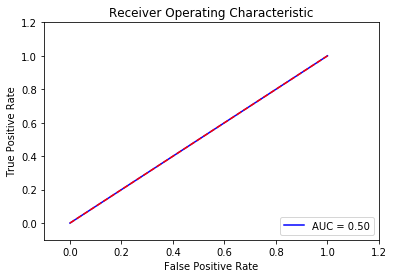

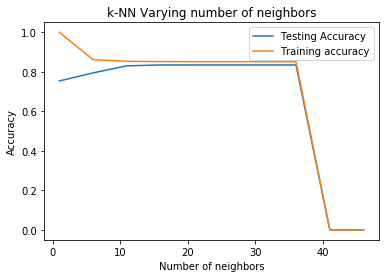

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 41 is 86%


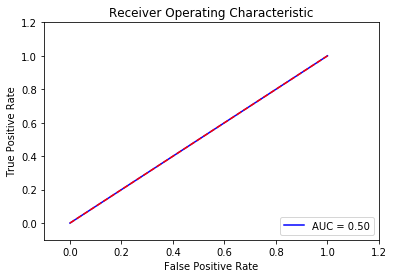

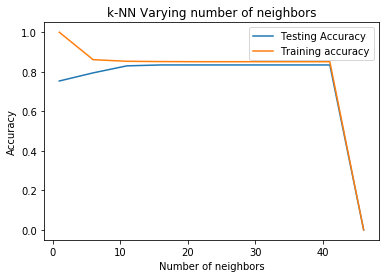

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349

CV accuracy for k = 46 is 86%


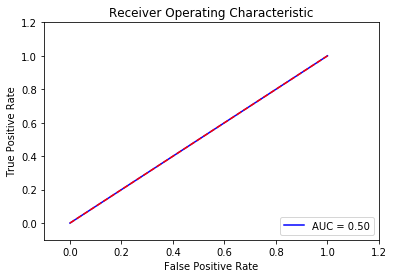

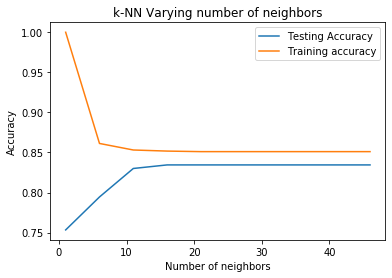

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.87      1.00      0.93       545

    accuracy                           0.87       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.75      0.87      0.80       630

TP - True Negative 0
FP - False Positive 85
FN - False Negative 0
TP - True Positive 545
Accuracy Rate: 0.8650793650793651
Misclassification Rate: 0.1349206349206349


In [49]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_bow,text_bow))
X = hstack((categories_one_hot, sub_categories_one_hot, project_title_bow,text_bow))

y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
knn_cross_validation(X,y)


### 2.4.2 Applying KNN brute force on TFIDF Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF),<font color='red'> SET 2</font>


CV accuracy for k = 1 is 78%


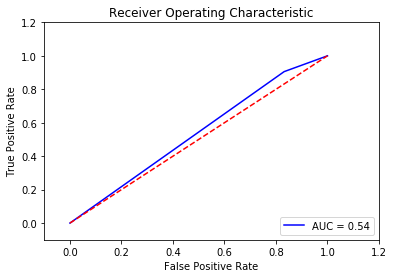

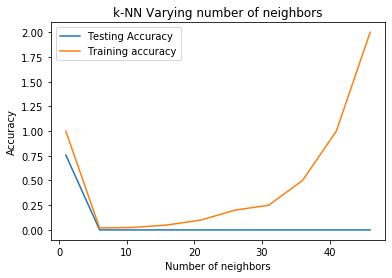

              precision    recall  f1-score   support

           0       0.25      0.17      0.20       101
           1       0.85      0.91      0.88       529

    accuracy                           0.79       630
   macro avg       0.55      0.54      0.54       630
weighted avg       0.76      0.79      0.77       630

TP - True Negative 17
FP - False Positive 84
FN - False Negative 50
TP - True Positive 479
Accuracy Rate: 0.7873015873015873
Misclassification Rate: 0.2126984126984127

CV accuracy for k = 6 is 81%


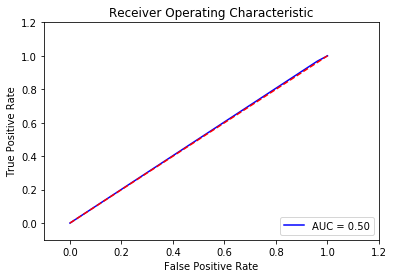

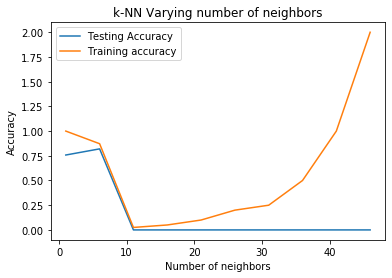

              precision    recall  f1-score   support

           0       0.19      0.04      0.07       101
           1       0.84      0.97      0.90       529

    accuracy                           0.82       630
   macro avg       0.52      0.50      0.48       630
weighted avg       0.74      0.82      0.77       630

TP - True Negative 4
FP - False Positive 97
FN - False Negative 17
TP - True Positive 512
Accuracy Rate: 0.819047619047619
Misclassification Rate: 0.18095238095238095

CV accuracy for k = 11 is 83%


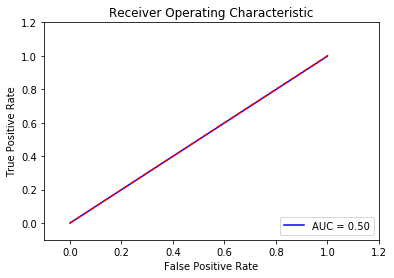

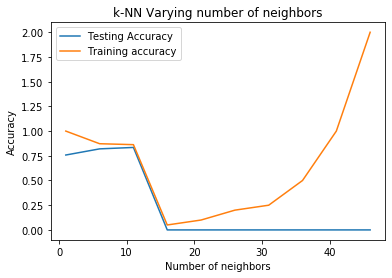

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.70      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 1
TP - True Positive 528
Accuracy Rate: 0.8380952380952381
Misclassification Rate: 0.1619047619047619

CV accuracy for k = 16 is 83%


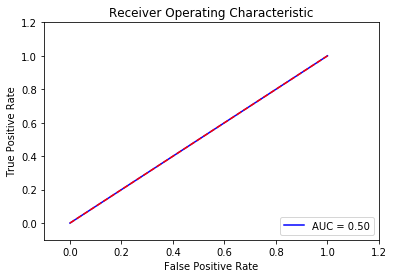

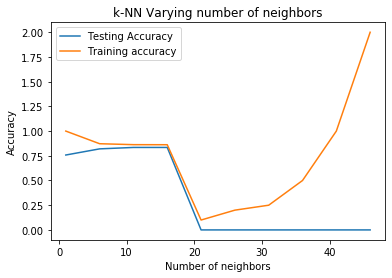

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 21 is 83%


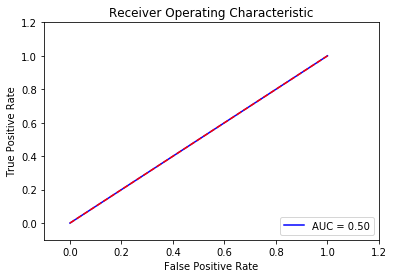

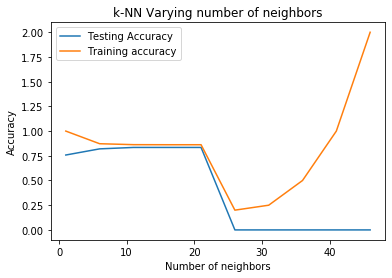

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 26 is 83%


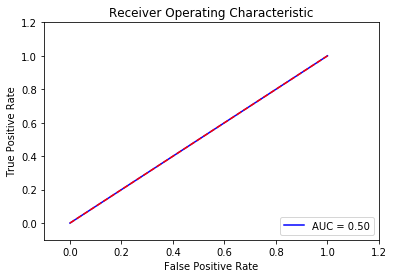

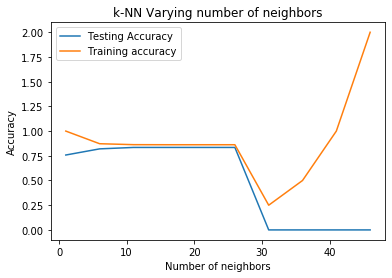

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 31 is 83%


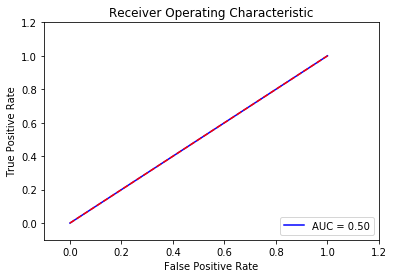

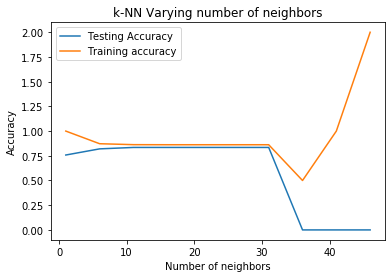

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 36 is 83%


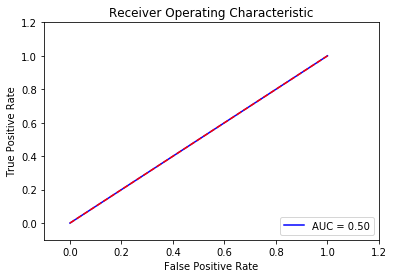

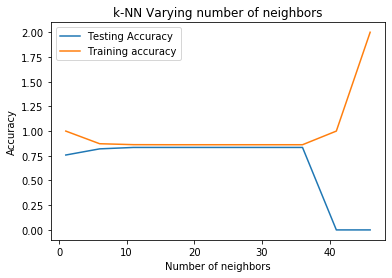

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 41 is 83%


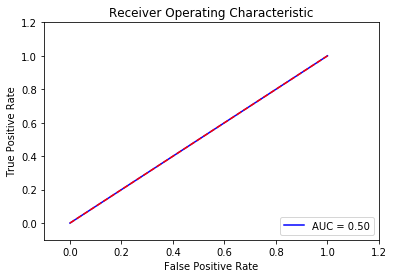

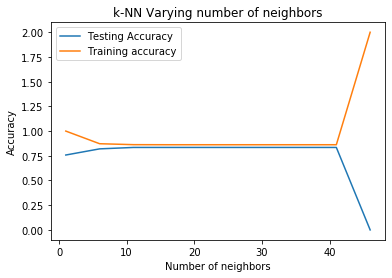

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033

CV accuracy for k = 46 is 83%


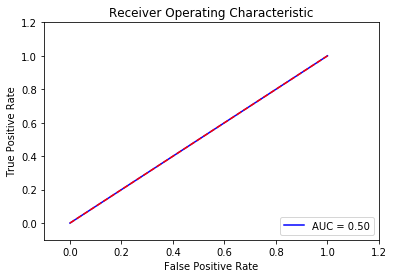

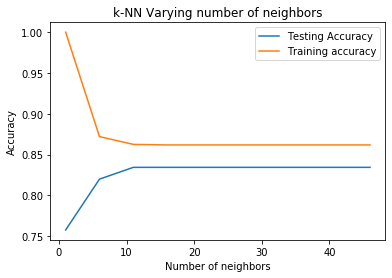

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       101
           1       0.84      1.00      0.91       529

    accuracy                           0.84       630
   macro avg       0.42      0.50      0.46       630
weighted avg       0.71      0.84      0.77       630

TP - True Negative 0
FP - False Positive 101
FN - False Negative 0
TP - True Positive 529
Accuracy Rate: 0.8396825396825397
Misclassification Rate: 0.16031746031746033


In [63]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_bow,text_bow))

#print (categories_one_hot)
#print (tfidf_words)
#print (project_title_tfidf)
#print (text_tfidf)

X = hstack((categories_one_hot, project_title_tfidf,text_tfidf))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
knn_cross_validation(X,y)

### 2.4.3 Applying KNN brute force on AVG W2V,<font color='red'> SET 3</font>


CV accuracy for k = 1 is 76%


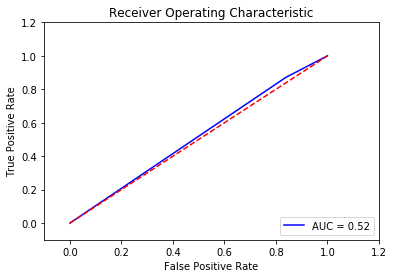

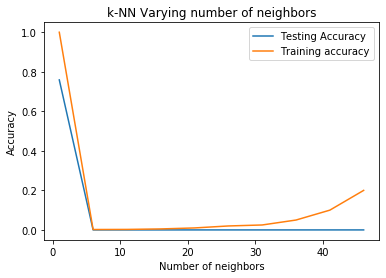

              precision    recall  f1-score   support

           0       0.18      0.16      0.17        93
           1       0.86      0.87      0.86       537

    accuracy                           0.77       630
   macro avg       0.52      0.52      0.52       630
weighted avg       0.76      0.77      0.76       630

TP - True Negative 15
FP - False Positive 78
FN - False Negative 69
TP - True Positive 468
Accuracy Rate: 0.7666666666666667
Misclassification Rate: 0.23333333333333334

CV accuracy for k = 6 is 80%


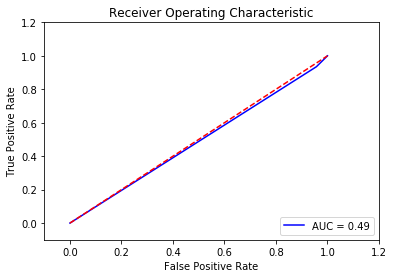

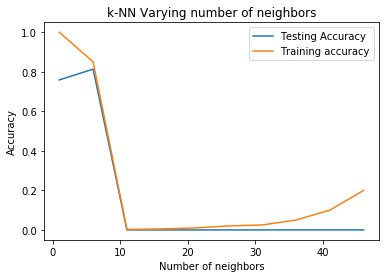

              precision    recall  f1-score   support

           0       0.10      0.04      0.06        93
           1       0.85      0.93      0.89       537

    accuracy                           0.80       630
   macro avg       0.48      0.49      0.48       630
weighted avg       0.74      0.80      0.77       630

TP - True Negative 4
FP - False Positive 89
FN - False Negative 35
TP - True Positive 502
Accuracy Rate: 0.8031746031746032
Misclassification Rate: 0.19682539682539682

CV accuracy for k = 11 is 84%


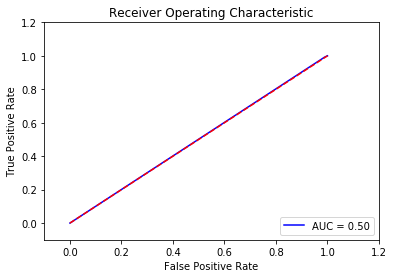

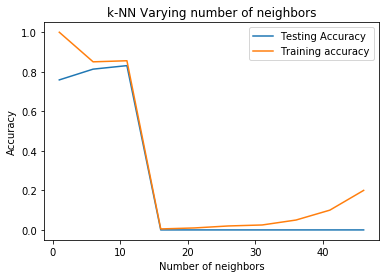

              precision    recall  f1-score   support

           0       0.20      0.01      0.02        93
           1       0.85      0.99      0.92       537

    accuracy                           0.85       630
   macro avg       0.53      0.50      0.47       630
weighted avg       0.76      0.85      0.78       630

TP - True Negative 1
FP - False Positive 92
FN - False Negative 4
TP - True Positive 533
Accuracy Rate: 0.8476190476190476
Misclassification Rate: 0.1523809523809524

CV accuracy for k = 16 is 84%


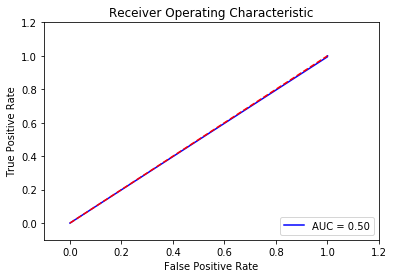

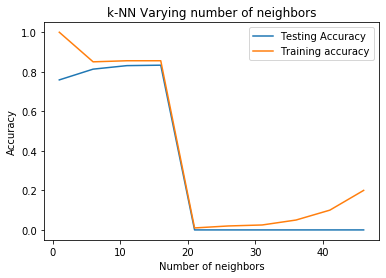

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      0.99      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 3
TP - True Positive 534
Accuracy Rate: 0.8476190476190476
Misclassification Rate: 0.1523809523809524

CV accuracy for k = 21 is 85%


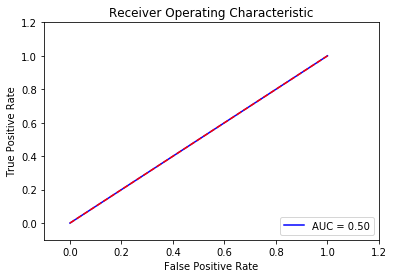

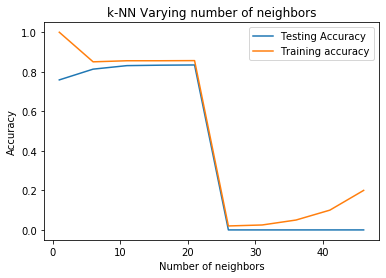

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762

CV accuracy for k = 26 is 85%


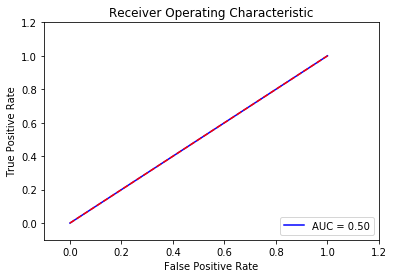

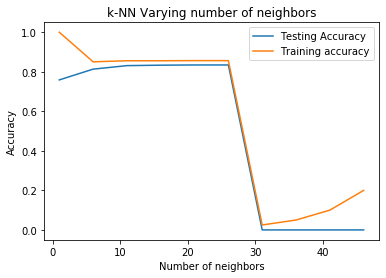

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762

CV accuracy for k = 31 is 85%


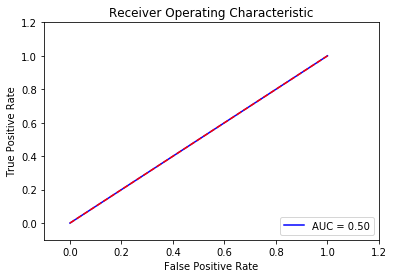

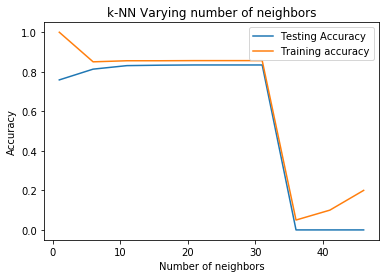

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762

CV accuracy for k = 36 is 85%


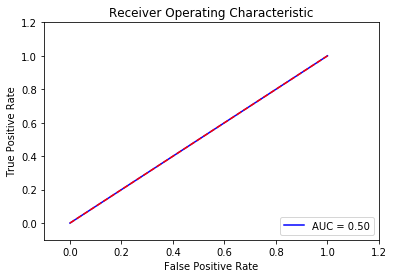

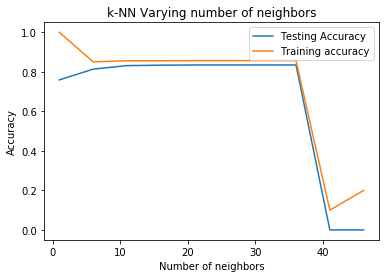

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762

CV accuracy for k = 41 is 85%


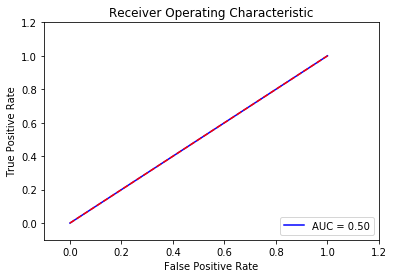

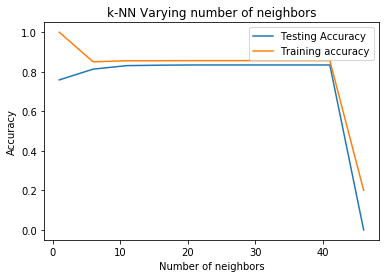

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762

CV accuracy for k = 46 is 85%


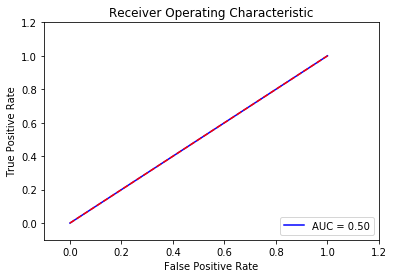

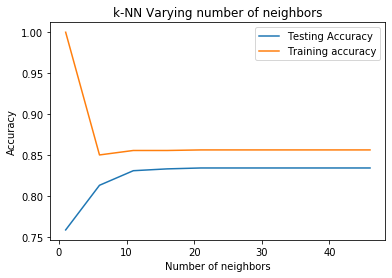

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.85      1.00      0.92       537

    accuracy                           0.85       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.73      0.85      0.78       630

TP - True Negative 0
FP - False Positive 93
FN - False Negative 0
TP - True Positive 537
Accuracy Rate: 0.8523809523809524
Misclassification Rate: 0.14761904761904762


In [64]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_avg_w2v_vectors,avg_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
knn_cross_validation(X,y)

### 2.4.4 Applying KNN brute force on TFIDF W2V,<font color='red'> SET 4</font>


CV accuracy for k = 1 is 75%


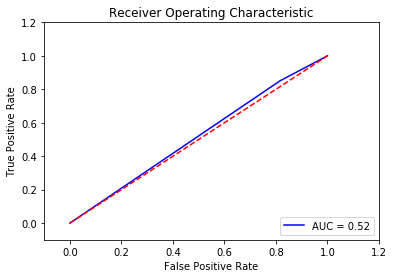

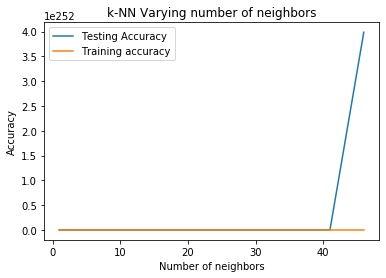

              precision    recall  f1-score   support

           0       0.16      0.18      0.17        87
           1       0.87      0.85      0.86       543

    accuracy                           0.76       630
   macro avg       0.52      0.52      0.52       630
weighted avg       0.77      0.76      0.76       630

TP - True Negative 16
FP - False Positive 71
FN - False Negative 81
TP - True Positive 462
Accuracy Rate: 0.7587301587301587
Misclassification Rate: 0.24126984126984127

CV accuracy for k = 6 is 82%


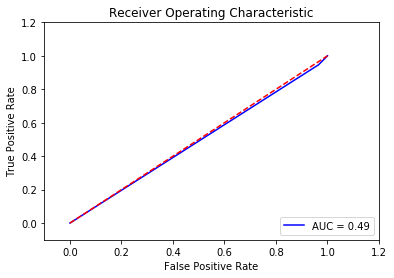

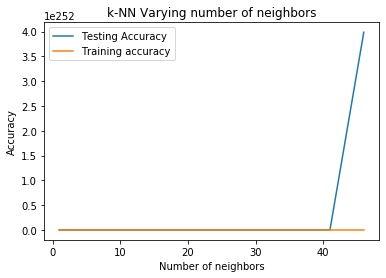

              precision    recall  f1-score   support

           0       0.09      0.03      0.05        87
           1       0.86      0.95      0.90       543

    accuracy                           0.82       630
   macro avg       0.48      0.49      0.48       630
weighted avg       0.75      0.82      0.78       630

TP - True Negative 3
FP - False Positive 84
FN - False Negative 29
TP - True Positive 514
Accuracy Rate: 0.8206349206349206
Misclassification Rate: 0.17936507936507937

CV accuracy for k = 11 is 85%


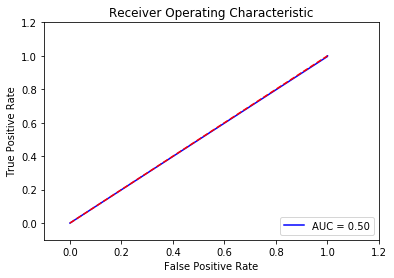

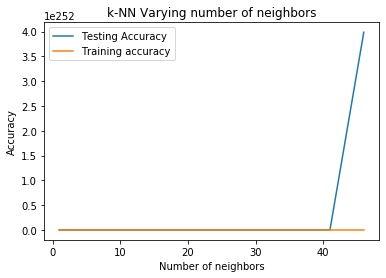

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.92       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 2
TP - True Positive 541
Accuracy Rate: 0.8587301587301587
Misclassification Rate: 0.14126984126984127

CV accuracy for k = 16 is 86%


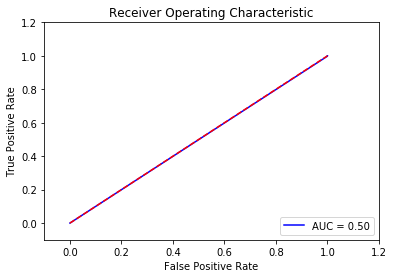

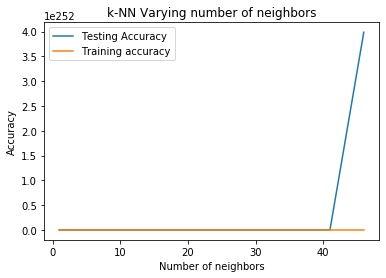

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.92       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 1
TP - True Positive 542
Accuracy Rate: 0.8603174603174604
Misclassification Rate: 0.13968253968253969

CV accuracy for k = 21 is 86%


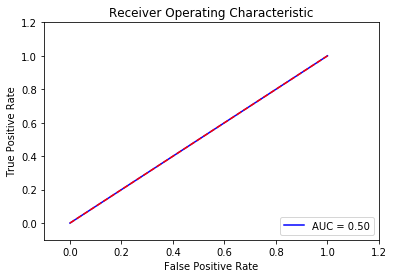

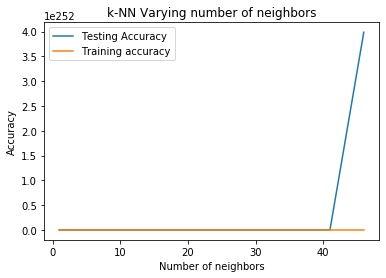

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381

CV accuracy for k = 26 is 86%


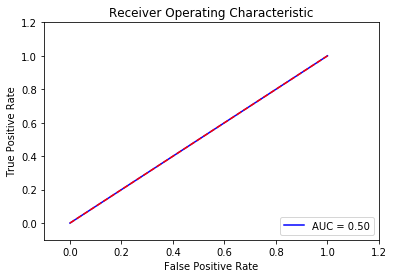

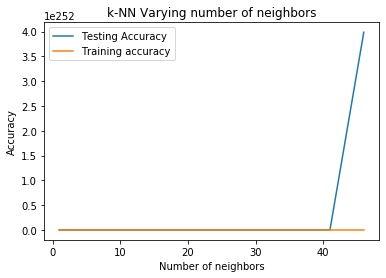

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381

CV accuracy for k = 31 is 86%


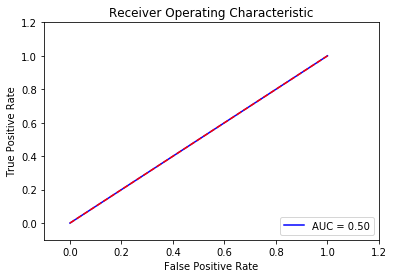

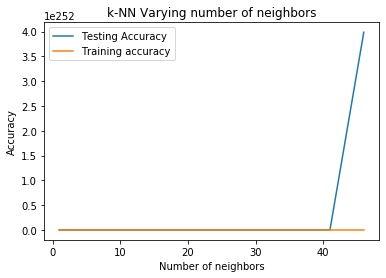

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381

CV accuracy for k = 36 is 86%


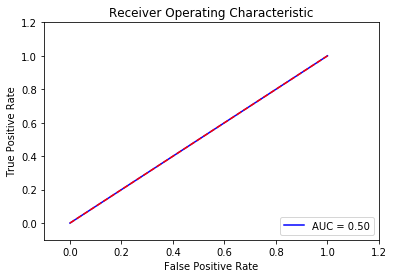

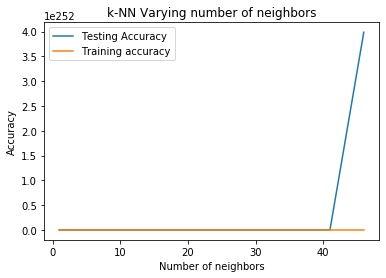

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381

CV accuracy for k = 41 is 86%


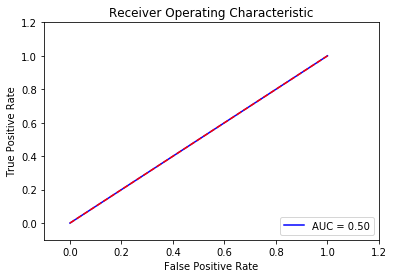

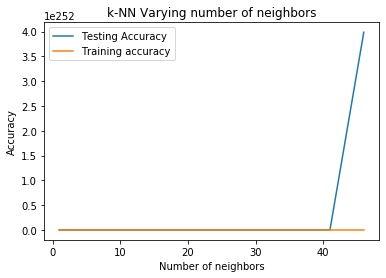

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381

CV accuracy for k = 46 is 86%


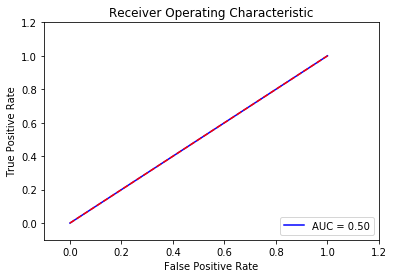

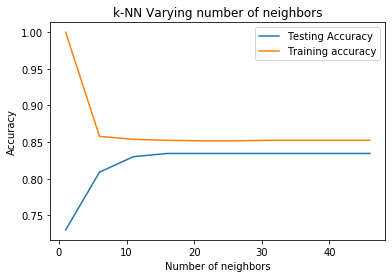

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        87
           1       0.86      1.00      0.93       543

    accuracy                           0.86       630
   macro avg       0.43      0.50      0.46       630
weighted avg       0.74      0.86      0.80       630

TP - True Negative 0
FP - False Positive 87
FN - False Negative 0
TP - True Positive 543
Accuracy Rate: 0.861904761904762
Misclassification Rate: 0.1380952380952381


In [65]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_tfidf_w2v_vectors,preprocessed_essays_tfidf_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
knn_cross_validation(X,y)

<h2>2.5 Feature selection with `SelectKBest` </h2>

In [53]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label


### 2.5.1 <font color='red'> K-Analysis  <font color='blue'> categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW),<font color='red'> SET 1</font>

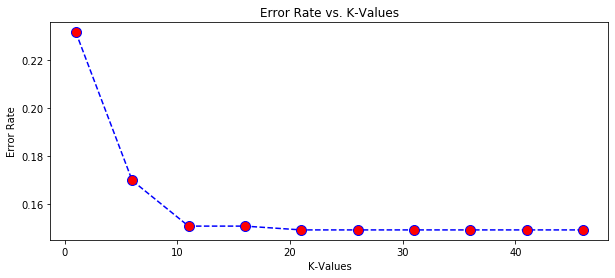

In [66]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_bow,text_bow))
X = hstack((categories_one_hot, sub_categories_one_hot, project_title_bow,text_bow))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
kanalysis_cross_validation(X,y)

#Here we see that the error rate continues to decrease as we increase the k-value. We are able to understand what value of k leads to an optimal model. 
#The k-value of 23 seems to give a decent error rate without too much noise.


### 2.5.2 <font color='red'> K-Analysis   <font color='blue'>  on TFIDF Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF),<font color='red'> SET 2</font>

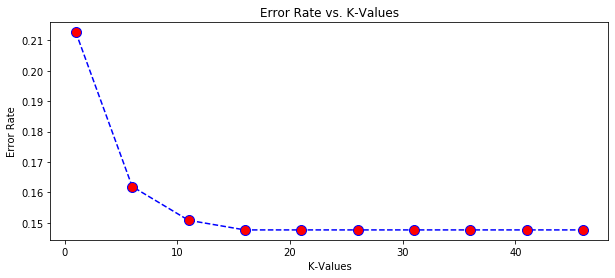

In [55]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X = hstack((categories_one_hot, project_title_tfidf,text_tfidf))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
kanalysis_cross_validation(X,y)

### 2.5.3 <font color='red'> K-Analysis     <font color='blue'>  on AVG W2V - categorical, numerical features + project_title(AVG W2V )+ preprocessed_essay (AVG W2V ),<font color='red'> SET 3</font>

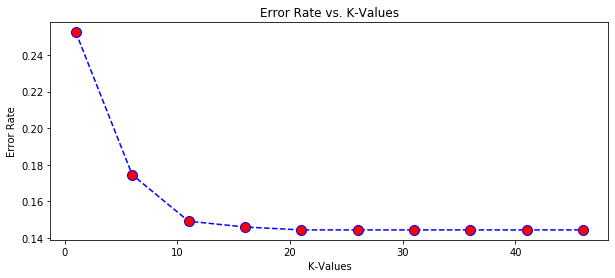

In [56]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_avg_w2v_vectors,avg_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
kanalysis_cross_validation(X,y)

### 2.5.4 <font color='red'>  K-Analysis     <font color='blue'>  on on TFIDF W2V  - categorical, numerical features + project_title(TFIDF W2V )+ preprocessed_essay (TFIDF W2V ),<font color='red'> SET 4</font>

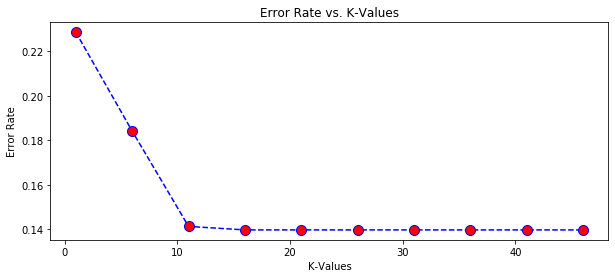

In [57]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_tfidf_w2v_vectors,preprocessed_essays_tfidf_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
kanalysis_cross_validation(X,y)

### 3.1 <font color='red'> K-BEST  <font color='blue'> categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW),<font color='red'> SET 1</font>

22

CV accuracy for k = 22 is 83%

****Test accuracy for k = 22 is 83%


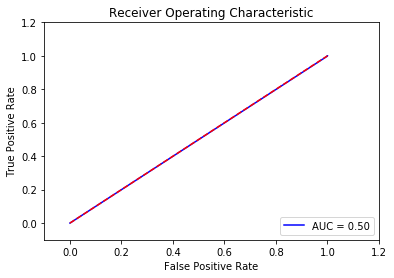

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.83      1.00      0.91       751

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.70      0.83      0.76       900

TP - True Negative 0
FP - False Positive 149
FN - False Negative 1
TP - True Positive 750
Accuracy Rate: 0.8333333333333334
Misclassification Rate: 0.16666666666666666


In [58]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_bow,text_bow))
X = hstack((categories_one_hot, sub_categories_one_hot, project_title_bow,text_bow))

y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
Best_k=22
knn_best_nfold_validation(X,y,Best_k)


In [59]:
### 3.2 <font color='red'> K-Best   <font color='blue'>  on TFIDF Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_essay (TFIDF),<font color='red'> SET 2</font>

35

CV accuracy for k = 35 is 85%

****Test accuracy for k = 35 is 83%


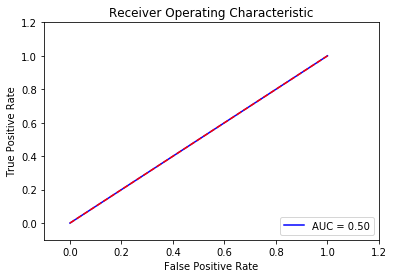

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.83      1.00      0.91       751

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.70      0.83      0.76       900

TP - True Negative 0
FP - False Positive 149
FN - False Negative 0
TP - True Positive 751
Accuracy Rate: 0.8344444444444444
Misclassification Rate: 0.16555555555555557


In [60]:
# Please write all the code with proper documentation

# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X = hstack((categories_one_hot, project_title_tfidf,text_tfidf))
y = project_data['project_is_approved'].astype(int).values
X=X.toarray()
Best_k=35
knn_best_nfold_validation(X,y,Best_k)

### 3.3 <font color='red'> K-Best   <font color='blue'>  on AVG W2V - categorical, numerical features + project_title(AVG W2V )+ preprocessed_essay (AVG W2V ),<font color='red'> SET 3</font>

22

CV accuracy for k = 22 is 85%

****Test accuracy for k = 22 is 83%


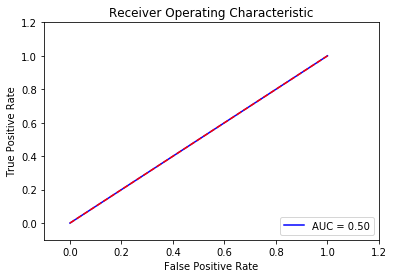

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.83      1.00      0.91       751

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.70      0.83      0.76       900

TP - True Negative 0
FP - False Positive 149
FN - False Negative 0
TP - True Positive 751
Accuracy Rate: 0.8344444444444444
Misclassification Rate: 0.16555555555555557


In [61]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_avg_w2v_vectors,avg_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
Best_k=22
knn_best_nfold_validation(X,y,Best_k)

### 3.4 <font color='red'> K-Best   <font color='blue'>  on on TFIDF W2V  - categorical, numerical features + project_title(TFIDF W2V )+ preprocessed_essay (TFIDF W2V ),<font color='red'> SET 4</font>

15

CV accuracy for k = 15 is 85%

****Test accuracy for k = 15 is 83%


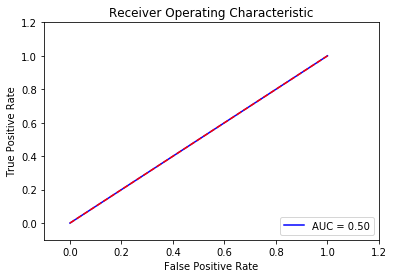

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       149
           1       0.83      1.00      0.91       751

    accuracy                           0.83       900
   macro avg       0.42      0.50      0.45       900
weighted avg       0.70      0.83      0.76       900

TP - True Negative 0
FP - False Positive 149
FN - False Negative 0
TP - True Positive 751
Accuracy Rate: 0.8344444444444444
Misclassification Rate: 0.16555555555555557


In [62]:
# Please write all the code with proper documentation
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
#X = hstack((categories_one_hot, sub_categories_one_hot, price_standardized, project_title_avg_w2v_vectors,avg_w2v_vectors))
X = hstack((categories_one_hot, project_title_tfidf_w2v_vectors,preprocessed_essays_tfidf_w2v_vectors))
y = project_data['project_is_approved'].astype(int).values
Best_k= 15
knn_best_nfold_validation(X,y,Best_k)

<h1>3. Conclusions</h1>

## Summary of above program as below:
### Step 1: Import the necessary Libraries
we will need to import libraries that allow for data analysis and data visualization to get acclimated to the dataset. We will be using pandas, numpy, matplotlib and seaborn to conduct this. Data Exploration libraries

### Step 2: Read in the dataset.
We will use the pandas .read_csv() method to read in the dataset. Then we will use the. head() method to observe the first few rows of the data, to understand the information better. In our case, the feature(column) headers tell us pretty little. This is fine because we are merely trying to gain insight via classifying new data points by referencing it’s neighboring elements.

### Step 3: Standardize (normalize) the data scale to prep for KNN algorithm.
Because the distance between pairs of points plays a critical part on the classification, it is necessary to normalize the data This will generate an array of values. Again, KNN depends on the distance between each feature. Please see Section 1 for all normalization.

### Step 4: Split the normalized data into training and test sets.
This step is required to prepare us for the fitting (i.e. training) the model later. The “X” variable is a collection of all the features. The “y” variable is the target label which specifies the classification of 1 or 0 based. Our goal will be to identify which category the new data point should fall into.

Please see functions as covered below, used in above program: def kanalysis_cross_validation(X,y): def knn_best_nfold_validation(X,y, k): def knn(X,y, k):

### Step 5: Create and Train the Model.
Here we create a KNN Object and use the .fit() method to train the model. Upon completion of the model we should receive confirmation that the training has been complete

Please see functions as covered below, used in above program: def kanalysis_cross_validation(X,y): def knn_best_nfold_validation(X,y, k): def knn(X,y, k):

### Step 6: Make Predictions.
Here we review where our model was accurate and where it misclassified elements.

Please see functions as covered below, used in above program: def kanalysis_cross_validation(X,y): def knn_best_nfold_validation(X,y, k):

### Step 7: Evaluate the predictions.
Evaluate the Model by reviewing the classification report or confusion matrix. By reviewing these tables, we are able to evaluate how accurate our model is with new values.

def kanalysis_cross_validation(X,y): def knn_best_nfold_validation(X,y, k):

### Setp 8:Classification Report :
This tells us our model was around 84% accurate… Print out classification report and confusion matrix

print(classification_report(y_test, pred))

I have covered various set to show confusion matrix.

Please see section 2. covered various data sets and created confusion matrix.

### Step 9: Evaluate alternative K-values for better predictions.
To simplify the process of evaluating multiple cases of k-values, we create a function to derive the error using the average where our predictions were not equal to the test values.

Please see section 2. covered various data sets and created error accuracy reports.

### Step 10: Plot Error Rate
Here we see that the error rate continues to decrease as we increase the k-value. A picture tells a thousand words. Or at least here, we are able to understand what value of k leads to an optimal model. The k-value of 17 seems to give a decent error rate without too much noise, as we see with k-values of 28 and larger.

### Step 11: Adjust K value per error rate evaluations 
This is just fine tuning our model to increase accuracy. We will need to retrain our model with the new k-value.
Please see section 3 in above program. we have created confusion matrix for optimal KNN value for various data sets. As we can see for optimal KNN, Accuracy is much higher - so prediction is much better.
